In [3]:
using JLD2
# using PythonPlot
include("MDPModelFunctions2.jl")
using DataFrames
using ImageFiltering
include("setupPythonPlot.jl")
using Distributions

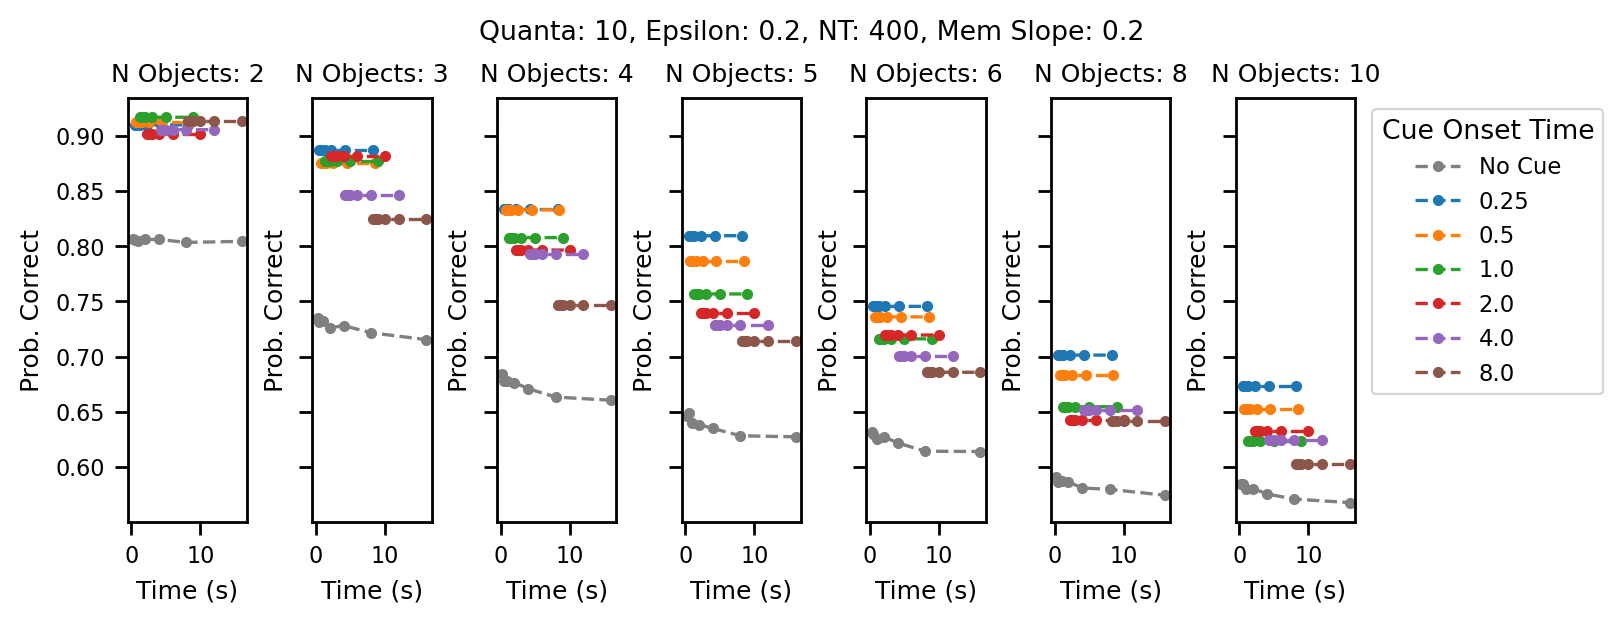

Python: <matplotlib.legend.Legend object at 0x331d64890>

In [9]:
# build script to load results

function load_results(N_Quanta, epsilon, NT_per_Second; res_part = "delayed_memory")

    # res_part should either be "delayed_memory" or "retrocue"

    res_folder = "/Users/erussek/Dropbox/Griffiths_Lab_Stuff/Data/Memory_Models/manyloadsim_run1"
    
    file_name = "N_Quanta_$(N_Quanta)_epsilon_$(epsilon)_NT_$(NT_per_Second).jld2"

    full_file_path = joinpath(res_folder, res_part, file_name)

    results = load(full_file_path)
    
    return results

end



# function to load delay_prob_correct and retro_cue_prob_correct
function load_prob_correct(N_Quanta, epsilon, NT_per_Second)

    # load delayed memory results
    these_res = load_results(N_Quanta, epsilon, NT_per_Second, res_part = "delayed_memory")

    # N_Obj X N_Sec, N_Memslopes - delay_prob_correct
    delay_prob_correct = these_res["delay_prob_correct"]

    # load retro cue results
    these_res = load_results(N_Quanta, epsilon, NT_per_Second, res_part = "retrocue")

    # N_Obj, N_Sec_Pre, N_Sec_Post, N_Memslopes - retro_cue_prob_correct
    retro_cue_prob_correct = these_res["retro_cue_prob_correct"]

    return delay_prob_correct, retro_cue_prob_correct

end

# Epsilon values 
eps_vals = collect(1:-.02:.01) # 17
N_eps = length(eps_vals)

# Quanta values
q_vals = collect(2:4:100) #
N_q = length(q_vals)

# NT vals
NT_vals = [25,50,100,200,400, 800]
N_NT = length(NT_vals)

N_Object_Vals = [2, 3, 4, 5, 6, 8, 10];
N_N_Object_vals = length(N_Object_Vals)

# Mem Slope Vals
# memory slopes (this won't be looped over)
mem_slopes = [.025, .05, .1, .2, .4, .8, 1.6]
N_ms = length(mem_slopes)

# Other values are time before cue and time after cue
N_Seconds_Pre_Vals = .25 * 2 .^ (0:5)
N_Seconds_Post_Vals = .25 * 2 .^ (0:5)

# For trials with no retro-cue - start from .25 seconds and multiply by 1.5 8 times
N_Seconds_NoCue = .25 * 2 .^ (0:6)

eps_val = .2
q_val = 10
# q_idx = 2
NT_idx = 5
ms_idx = 4

# specify epsilon as a value and find the closest index for ep_idx
function find_eps_idx(epsilon)
    return argmin(abs.(eps_vals .- epsilon))
end
ep_idx = find_eps_idx(eps_val)

# specify q as a value and find the closest index for q_idx
function find_q_idx(N_Quanta)
    return argmin(abs.(q_vals .- N_Quanta))
end
q_idx = find_q_idx(q_val)


# load results
delay_prob_correct, retro_cue_prob_correct = load_prob_correct(q_vals[q_idx], eps_vals[ep_idx], NT_vals[NT_idx])

# plot delay_prob_correct and retro_cue_prob_correct
fig, ax = subplots(1, N_N_Object_vals, figsize=(8, 3), dpi=200, constrained_layout=true, sharex = true, sharey = true)

# give the plot a title listing all the parameter values
fig.suptitle("Quanta: $(q_vals[q_idx]), Epsilon: $(eps_vals[ep_idx]), NT: $(NT_vals[NT_idx]), Mem Slope: $(mem_slopes[ms_idx])")

for N_Obj_idx = 1:N_N_Object_vals
    ax[N_Obj_idx-1].plot(N_Seconds_NoCue, delay_prob_correct[N_Obj_idx, :, ms_idx], "--o", color = "gray", ms = 3, label = "No Cue")
    
    for N_Sec_Pre_idx = 1:length(N_Seconds_Pre_Vals)
        N_Seconds_Pre = N_Seconds_Pre_Vals[N_Sec_Pre_idx]
        ax[N_Obj_idx-1].plot(N_Seconds_Pre .+ N_Seconds_Post_Vals, retro_cue_prob_correct[N_Obj_idx, N_Sec_Pre_idx, :, ms_idx], "--o", ms = 3, label = "$(round(N_Seconds_Pre, digits = 2))")
    end

    ax[N_Obj_idx-1].set_title("N Objects: $(N_Object_Vals[N_Obj_idx])")
    ax[N_Obj_idx-1].set_xlabel("Time (s)")
    ax[N_Obj_idx-1].set_ylabel("Prob. Correct")

end

ax[N_N_Object_vals-1].legend(title = "Cue Onset Time", bbox_to_anchor=(1.05, 1), loc="upper left")

In [19]:
# print out all the condition values that were run, nicely formatted - N_obj, N_Sec_pre, N_Sec_post, N_sec_no_cue
println("N_Object: $(N_Object_Vals), N_Sec_Pre: $(N_Seconds_Pre_Vals), N_Sec_Post: $(N_Seconds_Post_Vals), N_Sec_No_Cue: $(N_Seconds_NoCue)")

N_Object: [2, 3, 4, 5, 6, 8, 10], N_Sec_Pre: [0.25, 0.5, 1.0, 2.0, 4.0, 8.0], N_Sec_Post: [0.25, 0.5, 1.0, 2.0, 4.0, 8.0], N_Sec_No_Cue: [0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0]


N_eps